In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
data=pd.read_csv('tip.csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# outlier removal

<Axes: xlabel='tip'>

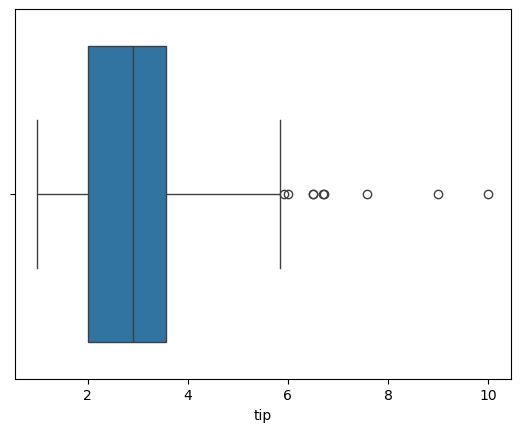

In [48]:
sns.boxplot(x='tip',data=data)

<Axes: xlabel='tip'>

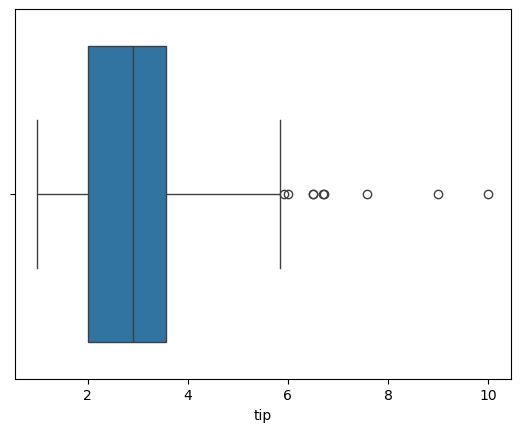

In [49]:
sns.boxplot(x='tip',data=data)

<Axes: xlabel='size'>

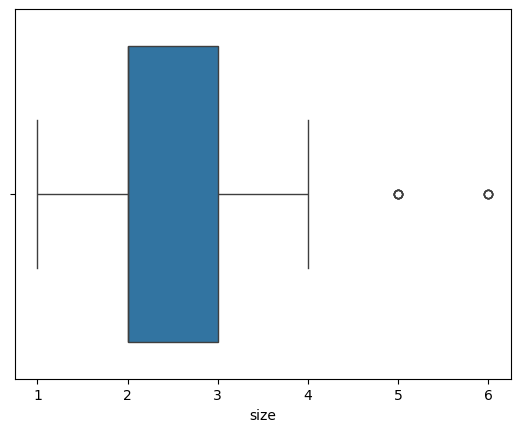

In [30]:
sns.boxplot(x='size',data=data)

# Removing outliers using :-IQR bases Filtiring

In [35]:
# for total_bill
a_percentile25=data['total_bill'].quantile(0.25)
a_percentile75=data['total_bill'].quantile(0.75)

In [36]:
a_iqr=a_percentile75-a_percentile25

In [37]:
a_upper_limit=a_percentile75+1.5*a_iqr
a_lower_limit=a_percentile25-1.5*a_iqr

In [38]:
#for tips
b_percentile25=data['tip'].quantile(0.25)
b_percentile75=data['tip'].quantile(0.75)

In [39]:
b_iqr=b_percentile75-b_percentile25

In [40]:
b_upper_limit=b_percentile75+1.5*b_iqr
b_lower_limit=b_percentile25-1.5*b_iqr

In [41]:
#for size
c_percentile25=data['tip'].quantile(0.25)
c_percentile75=data['tip'].quantile(0.75)

In [42]:
c_iqr=c_percentile75-c_percentile25

In [43]:
c_upper_limit=c_percentile75+1.5*c_iqr
c_lower_limit=c_percentile25-1.5*c_iqr

# Finding outlier

In [44]:
data[data['total_bill']>a_upper_limit]
data[data['tip']>b_upper_limit]
data[data['size']>c_upper_limit]

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
141,34.30,6.7,Male,No,Thur,Lunch,6
143,27.05,5.0,Female,No,Thur,Lunch,6
156,48.17,5.0,Male,No,Sun,Dinner,6


# Capping

In [94]:
old_data=data.copy()

#capping for total_bill
old_data['total_bill']=np.where(
    old_data['total_bill']>a_upper_limit,
    a_upper_limit,
    np.where(
        old_data['total_bill']<a_lower_limit,
        a_lower_limit,
        old_data['total_bill']
    )
)

#capping for tips
old_data['tip']=np.where(
    old_data['tip']>b_upper_limit,
    b_upper_limit,
    np.where(
        old_data['tip']<b_lower_limit,
        b_lower_limit,
        old_data['tip']
    )
)
#capping for size
old_data['size']=np.where(
    old_data['size']>c_upper_limit,
    c_upper_limit,
    np.where(
        old_data['size']<c_lower_limit,
        c_lower_limit,
        old_data['size']
    )
)


# Trian_test_Split

In [67]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(old_data.drop('tip',axis=1),old_data['tip'],test_size=0.2)
x_train

,total_bill,sex,smoker,day,time,size
139,13.16,Female,No,Thur,Lunch,2.0
111,7.25,Female,No,Sat,Dinner,1.0
157,25.00,Female,No,Sun,Dinner,4.0
226,10.09,Female,Yes,Fri,Lunch,2.0
207,38.73,Male,Yes,Sat,Dinner,4.0
...,...,...,...,...,...,...
203,16.40,Female,Yes,Thur,Lunch,2.0
188,18.15,Female,Yes,Sun,Dinner,3.0
99,12.46,Male,No,Fri,Dinner,2.0
206,26.59,Male,Yes,Sat,Dinner,3.0


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

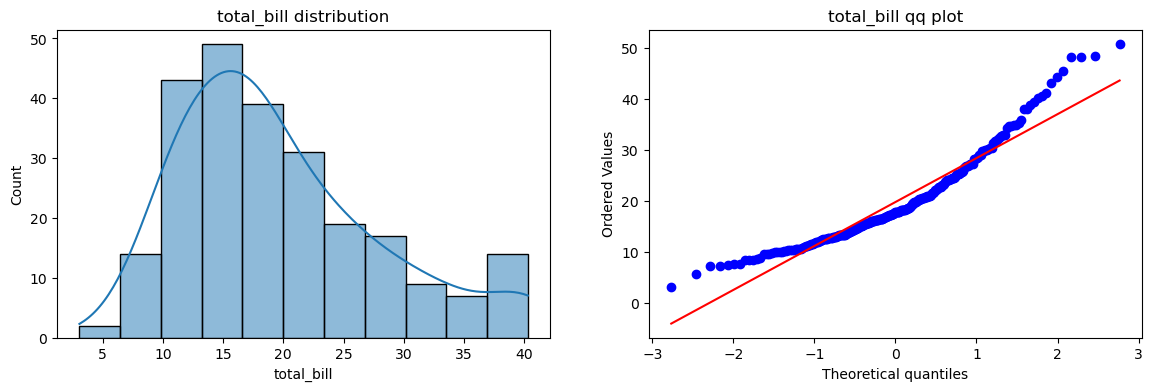

In [74]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(old_data['total_bill'],kde=True)
plt.title('total_bill distribution')
plt.subplot(122)
stats.probplot(data['total_bill'], dist="norm", plot=plt)
plt.title('total_bill qq plot')
plt.show()

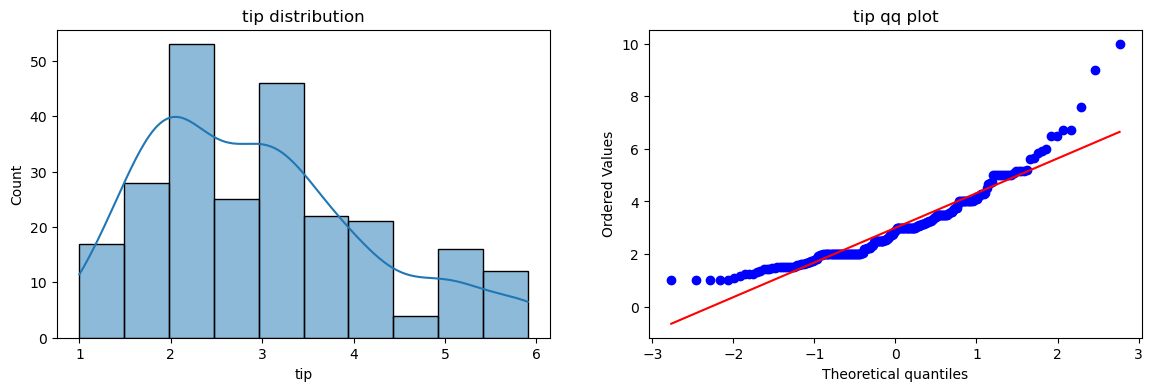

In [75]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(old_data['tip'],kde=True)
plt.title('tip distribution')
plt.subplot(122)
stats.probplot(data['tip'], dist="norm", plot=plt)
plt.title('tip qq plot')
plt.show()

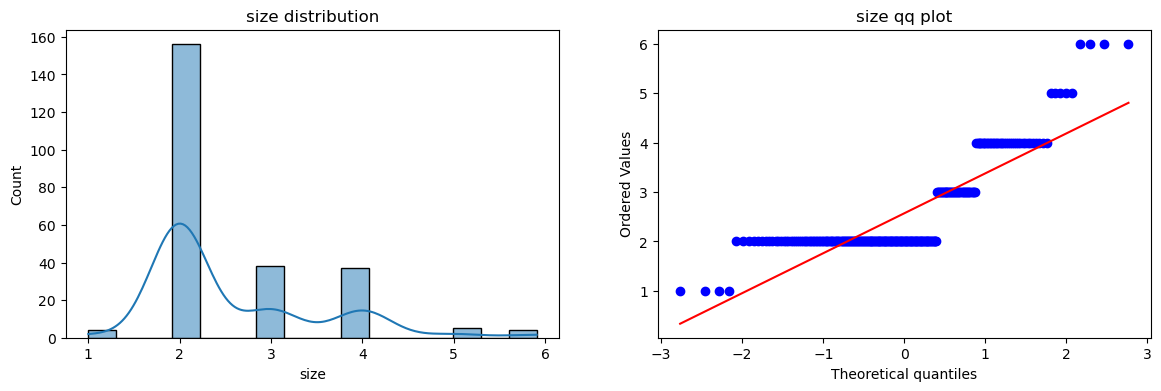

In [76]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(old_data['size'],kde=True)
plt.title('size distribution')
plt.subplot(122)
stats.probplot(data['size'], dist="norm", plot=plt)
plt.title('size qq plot')
plt.show()

# Column Transformer

In [96]:
trf1=ColumnTransformer(transformers=[
    ('name1',FunctionTransformer(func=np.log1p),[0,5])
],remainder='passthrough')

In [97]:
trf2=ColumnTransformer(transformers=[
    ('name2',OneHotEncoder(sparse_output=False,drop='first'),[1,2,3,4])
],remainder='passthrough')

In [98]:
trf3=ColumnTransformer(transformers=[
    ('name2',StandardScaler(),slice(0,9))
])

In [99]:
trf4=LinearRegression()

# Pipeline

In [100]:
from sklearn.pipeline import Pipeline

In [103]:
pipe=Pipeline([
    ('name1',trf1),
    ('name2',trf2),
    ('name3',trf3),
    ('name4',trf4)
])


In [104]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('name1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [0, 5])])),
                ('name2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 2, 3, 4])])),
                ('name3',
                 ColumnTransformer(transformers=[('name2', StandardScaler(),
                                                  slice(0, 9, None))])),
                ('name4', LinearRegression())])

In [108]:
y_predict=pipe.predict(x_test)

In [106]:
y_test

178    4.00000
79     2.71000
148    1.73000
28     4.30000
130    1.50000
32     3.00000
52     5.20000
176    2.00000
64     2.64000
27     2.00000
241    2.00000
89     3.00000
20     4.08000
143    5.00000
41     2.54000
146    1.36000
78     3.00000
47     5.90625
24     3.18000
44     5.60000
34     3.27000
172    5.15000
242    1.75000
198    2.00000
16     1.67000
50     2.50000
126    1.48000
101    3.00000
74     2.20000
112    4.00000
136    2.00000
222    1.92000
14     3.02000
129    2.18000
211    5.16000
155    5.14000
11     5.00000
19     3.35000
82     1.83000
215    1.10000
122    2.50000
117    1.50000
2      3.50000
168    1.61000
5      4.71000
190    1.50000
102    2.50000
66     2.47000
76     3.08000
Name: tip, dtype: float64

In [109]:
from sklearn.metrics import r2_score

print("R² Score:", r2_score(y_test,y_predict))

R² Score: 0.3092733202814818
